<a href="https://colab.research.google.com/github/gabrielaugustom/meu-portfolio/blob/master/Analise_Atila_Coronavirus_youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLP para analisar Atila Iamarino, Biólogo, pesquisador e Doutor.

O **Processamento de Linguagem Natural (Natural Language Processing – NLP)** é um campo da **Ciência da Computação e Inteligência Artificial** que desenvolve a capacidade de **máquinas entenderem a nossa linguagem**. Mais que apenas “entender”, com a NLP é possível interpretar frases, realizar análises semânticas ou **analisar sentimentos**.

Para modelar a língua e possibilitar que máquina entenda, são necessários processamentos com o *dataset* deixando apenas o que é informação relevante. 

<center><img alt="Analisando Airbnb" width="40%" src="https://media.istockphoto.com/illustrations/word-cloud-nlp-illustration-id491732085"></center>

O campo é gigante e promissor. Técnicas de Machine Learning aplicadas à análise de dados permitem coisas como:

* Identificar se uma avaliação feita em um livro na Amazon foi positiva ou negativa.

* **Identificar sintomas de depressão** em pessoas a partir de suas postagens em redes sociais como Facebook ou Twitter.

* Encontrar potenciais eleitores favoráveis a um determinado candidato; e

* Identificar quais palavras são mais utilizadas pelo analisado em uma entrevista.

Neste artigo, meu objetivo é apresentar a área da NLP e técnicas de Text Mining usando Python para que você conheça as possibilidades e potencialidades de uso.

<center><img alt="Analisando Airbnb" width="80%" src="https://ursopreto.com/wp-content/uploads/2019/12/Atila_iamarino_2019.jpg"></center>

<center>Atila Iamarino</center>

Atila Iamarino é um biólogo e pesquisador brasileiro formado em microbiologia, notório por seu trabalho no canal de YouTube denominado "Nerdologia", que possui mais de 2 milhões de inscritos e integra o grupo Jovem Nerd, uma plataforma digital de cultura pop, jogos eletrônicos e conteúdo jovem.

Pessoalmente falando, conheci o Atila pelo canal de Youtube Nerdologia. Sempre gostei da didática apresentada ali, avaliando o conteúdo como eficiente.

Recentemente com a Pandemia do COVID19, Atila se tornou alguém com força de engajamento notorial no Brasil sobre o tema.

O vídeo analisado em questão viralizou e foi comentado por grandes personalidades do país. O mais importante nesse meu estudo é entender quais palavras foram mais utilizadas neste momento e se o código conseguira passar clareza daqui que obtem da legenda com o que é falado por ele, relevancias iguais.


### Importando pacotes

Aqui estão descritos os pacotes que utilizaremos neste artigo.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Instalando pacotes 

Aqui iremos instalar a API de transcrição do YouTube e também de Wordcloud para que possamos visualizar o mapa de palavras obtido.

In [0]:
# Youtube transcript API
!pip install youtube_transcript_api -q

In [0]:
#  Wordcloud
!pip install wordcloud -q

### Obtendo os dados

Para analizar os dados de Processamento de Linguagem Natural (PLN) retirei o *dataset* do vídeo postado pela **Atila** em seu **Canal de Youtube**. O vídeo pode ser encontrado através do Link:

[Live Coronavírus de 20/03 - O que o Brasil precisa fazer nos próximos dias](https://www.youtube.com/watch?v=zF2pXXJIAGM)

O vídeo possui um **total de 1hr16min**.

In [0]:
# importando pacote
from youtube_transcript_api import YouTubeTranscriptApi

# obtendo os dados
transcript = YouTubeTranscriptApi.get_transcript('zF2pXXJIAGM', languages=['pt'])

# convertendo em DataFrame
df = pd.DataFrame(transcript)

# visualizando cinco primeiras entradas
df.head()

,text,start,duration
0,oi e a gente boa noite bom dia boa tarde,0.000,4.950
1,dependendo a hora que você tiver vindo,3.049,3.911
2,eu demorei um pouco para começar essa,4.950,3.420
3,live porque eu queria estar com os,6.960,3.599
4,números e com tudo bonitinho muito,8.370,3.540


### Limpando caracteres

A normalização é importante por começar a estruturar o texto, já que os processamentos seguintes atuam em cima de unidades sentenciais e lexicais.

In [0]:
# trocando pontuações por espaços
char = ["\n","!","?",".",","]
for symbol in char:
  df['text'] = df['text'].str.replace(symbol, " ")

# visualizando cinco primeiras entradas
df.head()

,text,start,duration
0,oi e a gente boa noite bom dia boa tarde,0.000,4.950
1,dependendo a hora que você tiver vindo,3.049,3.911
2,eu demorei um pouco para começar essa,4.950,3.420
3,live porque eu queria estar com os,6.960,3.599
4,números e com tudo bonitinho muito,8.370,3.540


### Plotando o Wordcloud

Wordcloud é uma lista hierarquizada visualmente, uma forma de apresentar os itens de conteúdo do *dataset*

A quantidade de palavras encontradas foi de **69.838** .

In [0]:
# concatenar as palavras
palavras = " ".join(s for s in df['text'])

print("Quantidade de Palavras: {}".format(len(palavras)))

Quantidade de Palavras: 69838


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


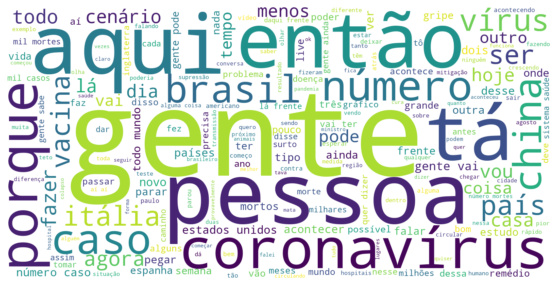

In [0]:
# importar wordcloud
from wordcloud import WordCloud

# importar a biblioteca nltk
import nltk
 
# baixar a base de stopwords
nltk.download('stopwords')
 
# atribuir as stopwords (em português) à variável
stopwords = nltk.corpus.stopwords.words('portuguese')

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show()

### Remoção de Stopwords

Uma das tarefas muito utilizadas no pré-processamento de textos é a remoção de stopwords. Esse método consiste em remover palavras muito frequentes, tais como “a”, “de”, “o”, “da”, “que”, “e”, “do” entre outras, pois na maioria das vezes não são informações relevantes para a construção do modelo.

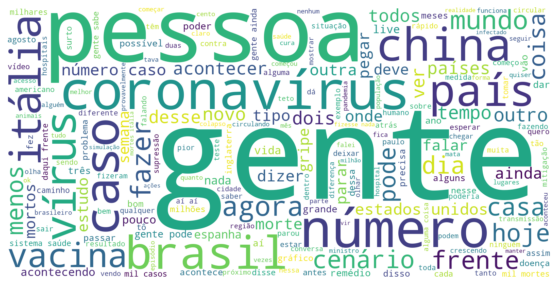

In [0]:
# lista de stopword
stopwords.extend(["pra","pro","deu","faz","vou","quer","vai","porque","então","lá","todo","acho","mim","aqui","ter","tá","ser"])


# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show()

In [0]:
sorted(((value,key) for (key,value) in wordcloud.words_.items()), reverse=True)[0:10]

[(1.0, 'gente'),
 (0.3840304182509506, 'pessoa'),
 (0.2623574144486692, 'coronavírus'),
 (0.25475285171102663, 'número'),
 (0.22053231939163498, 'caso'),
 (0.18631178707224336, 'china'),
 (0.18250950570342206, 'brasil'),
 (0.17490494296577946, 'país'),
 (0.17110266159695817, 'vírus'),
 (0.1596958174904943, 'itália')]

Na figura acima, extraí a frequência das palavras. Sem surpresa, **'gente', 'brasil', 'coronavírus' e 'itália'** foram as palavras **mais utilizadas** nesta live. 

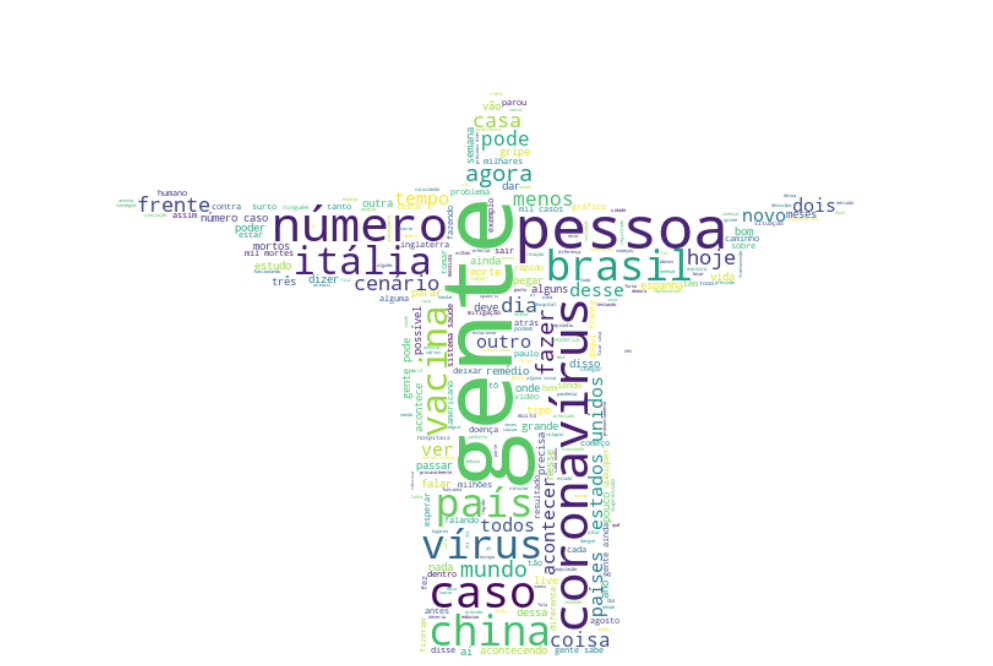

In [0]:
# endereço LOCAL da SUA imagem
venk = np.array(Image.open("/content/asd.jpg"))

wordcloud = WordCloud(background_color="white", max_words=2000, 
                      mask=venk, stopwords=stopwords, 
                      max_font_size=80, random_state=42).generate(palavras)


fig, ax = plt.subplots(figsize = (20,12))
ax.imshow(wordcloud, interpolation="bilinear")
ax.set_axis_off()
plt.show()

#Conclusão

Para facilitar o entendimento e gerar insights, criei uma wordcloud em cima da foto do Cristo Redentor, uma vez que o público alvo é brasileiro e ele o representa muito bem. A visualização facilita o entendimento, e isso pode ser comprovado ao olhar o resultado dessa nuvem relativa a legenda do vídeo retirado do Youtube.

Para um biólogo é natural que encontremos em seu vocabulário palavras em destaque como:

* Pessoa,
*  Gente,
*  Coronavírus,
*  Brasil,
*  China,
*  Itália,
*  Caso,
*  Números,

e como estamos analisando a legenda da live, lógico que teria em evidencia a **palavra Coronavírus**.

Espero que gostem e até breve.

<center> Gabriel Augusto Machado - Data Scientist


